# **심화 실습 10-1 : Modern CNN**

## **Import Module**

In [0]:
%tensorflow_version 2.x

import tensorflow as tf
#import tensorflow.keras as keras
from tensorflow.keras import models, datasets
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras.layers import MaxPool2D, MaxPool1D
from tensorflow.keras.layers import Dropout, BatchNormalization

import numpy as np
import matplotlib.pyplot as plt

tf.__version__

TensorFlow 2.x selected.


'2.0.0'

## **DataSet**

### Load

In [0]:

#img_dataset = datasets.fashion_mnist
img_dataset = datasets.cifar10

(x_train, y_train), (x_test, y_test) = img_dataset.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train.shape, x_test.shape, y_train.shape, y_test.shape


((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

### Preprocessing

In [0]:
'''
# for fashion_mnist or mnist dataset
# Add a channels dimension
#x_train = x_train[..., tf.newaxis] #(28,28,1)
#x_test = x_test[..., tf.newaxis]

# Converts class vectors to binary class matrices.
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

x_train.shape, x_test.shape, y_train.shape, y_test.shape
'''

'\n# for fashion_mnist or mnist dataset\n# Add a channels dimension\n#x_train = x_train[..., tf.newaxis] #(28,28,1)\n#x_test = x_test[..., tf.newaxis]\n\n# Converts class vectors to binary class matrices.\ny_train = tf.keras.utils.to_categorical(y_train, 10)\ny_test = tf.keras.utils.to_categorical(y_test, 10)\n\nx_train.shape, x_test.shape, y_train.shape, y_test.shape\n'

## DataSet: G-drive에서 압축된 zip파일을 복사해 와서 처리하기

### 1.0 G-drive mount

In [0]:
# Data size가 클때는 옮겨와서 처리하는 것이 좋음
# *Google* drive mount
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 1.0.0 import aidlutils

In [0]:
import sys
sys.path.append('/content/drive/Shared drives/scsa_2019_e/aidl-utils/basic')

from aidlutils import show_batch, check_dir, check_image

### 1.1 unzip the file

In [0]:
# check the images have been extracted
# extract images on colab drive
!tar -xf /content/drive/Shared\ drives/scsa_2019_e/z_data/flower_photos.tgz

### 1.2 check images

In [0]:
# check_dir() 사용할 수 있도록 준비
import pathlib

# set data_dir
#"/content"가 나의 colab의 시작
data_dir_cwd = pathlib.Path('/content/flower_photos')

In [0]:
# check_dir()로 폴더명과 이미지 숫자 확인
image_count_cwd, CLASS_NAMES_cwd = check_dir(data_dir_cwd)

class_num = len(CLASS_NAMES_cwd)
print('image_count: {}\nclasses: {}'.format(image_count_cwd, CLASS_NAMES_cwd))

image_count: 3670
classes: ['tulips' 'dandelion' 'roses' 'daisy' 'sunflowers']


In [0]:
# check_image()로 이미지 두장씩 확인 
#check_image(data_dir_cwd, CLASS_NAMES_cwd)

### 1.3 `ImageDataGenerator()`사용하기

In [0]:
# image generator 생성
# 1./255 : convert in range [0,1]
image_generator_cwd = (
    tf.keras.preprocessing.image.ImageDataGenerator(validation_split=0.2, 
                                                    rescale=1./255))

# image generator에 폴더path와 폴더명들을 지정하여 data set을 준비
train_data_gen_cwd = image_generator_cwd.flow_from_directory(
                        directory=str(data_dir_cwd),
                        #batch_size=32,
                        shuffle=True,
                        target_size=(112, 112),
                        classes = list(CLASS_NAMES_cwd),
                        subset='training'
                        )
test_data_gen_cwd = image_generator_cwd.flow_from_directory(
                        directory=str(data_dir_cwd),
                        #batch_size=32,
                        shuffle=True,
                        target_size=(112, 112),
                        classes = list(CLASS_NAMES_cwd),
                        subset='validation'
                        )

# 준비된 data set의 일부를 확인
#show_batch(train_data_gen_cwd, CLASS_NAMES_cwd)


Found 2939 images belonging to 5 classes.
Found 731 images belonging to 5 classes.


## **Model**

### Define

### Model_A define: Dropout 사용 model

In [0]:
# import tensorflow.keras.regularizers as regularizers

# # L1 regularization: 0.001  (0.01 ~ 0.0001)
# #model.add(Conv2D(128, 3, padding='same', activation='relu',
# #                 activity_regularizer=regularizers.l1(0.001)))
# # L2 regularization: 0.01 (0.1 ~ 0.001)
# #model.add(Conv2D(128, 3, padding='same', activation='relu',
# #                 activity_regularizer=regularizers.l2(0.01)))

# # DO: rate: 0.1 ~ 0.5
# #model.add(Dropout(rate=0.3))
# # BN: momentum: 0.7 ~ 0.99
# #model.add(BatchNormalization(momentum=0.8))

def model_cnn_basic():
  model = models.Sequential()
  # conv 1
  model.add(Conv2D(64,3,padding='same',activation='relu',input_shape=(112,112,3), activity_regularizer=regularizers.l2(0.01)))
  #model.add(BatchNormalization(momentum=0.85))
  model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

  # conv 2
  model.add(Conv2D(128, 3, padding='same', activation='relu'))
  #model.add(BatchNormalization(momentum=0.85))
  model.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))

  # conv 3
  model.add(Conv2D(512, 3, padding='same', activation='relu'))
  #model.add(BatchNormalization(momentum=0.85))
  model.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))
 
  # conv 4
  model.add(Conv2D(256, 3, padding='same', activation='relu'))
  #model.add(BatchNormalization(momentum=0.85))
  model.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))
  # Dense layers
  model.add(Flatten(name='flatten'))
  model.add(Dense(class_num, activation='softmax', name='dense_10'))

  return model

# model_basic = model_cnn_basic()

# model_basic.summary()
import tensorflow.keras.regularizers as regularizers

# L1 regularization: 0.001  (0.01 ~ 0.0001)
#model.add(Conv2D(128, 3, padding='same', activation='relu',
#                 activity_regularizer=regularizers.l1(0.001)))
# L2 regularization: 0.01 (0.1 ~ 0.001)
#model.add(Conv2D(128, 3, padding='same', activation='relu',
#                 activity_regularizer=regularizers.l2(0.01)))

# DO: rate: 0.1 ~ 0.5
#model.add(Dropout(rate=0.3))
# BN: momentum: 0.7 ~ 0.99
#model.add(BatchNormalization(momentum=0.8))

# def model_cnn_basic():
#   model = models.Sequential()
#   model.add(Conv2D(64,3,padding='same',activation='relu',input_shape=(112,112,3)))
#   model.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))
#   model.add(Dropout(rate=0.3))
# # conv 2
#   model.add(Conv2D(128, 3, padding='same', activation='relu'))

#   model.add(MaxPool2D(pool_size=(3,3), strides=(3,3)))
# # conv 3
#   model.add(Dropout(rate=0.3))
#   model.add(Conv2D(256, 3, padding='same', activation='relu'))
#   model.add(MaxPool2D(pool_size=(3,3), strides=(3,3)))
# # conv 4
#   model.add(Dropout(rate=0.3))
#   model.add(Conv2D(384, 3, padding='same', activation='relu'))
#   model.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))
# # Dense layers

#   model.add(Flatten(name='flatten'))
#   model.add(Dense(class_num, activation='softmax', name='dense_10'))

#  return model



model_basic = model_cnn_basic()

model_basic.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_97 (Conv2D)           (None, 112, 112, 64)      1792      
_________________________________________________________________
max_pooling2d_97 (MaxPooling (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_98 (Conv2D)           (None, 56, 56, 128)       73856     
_________________________________________________________________
max_pooling2d_98 (MaxPooling (None, 27, 27, 128)       0         
_________________________________________________________________
conv2d_99 (Conv2D)           (None, 27, 27, 512)       590336    
_________________________________________________________________
max_pooling2d_99 (MaxPooling (None, 13, 13, 512)       0         
_________________________________________________________________
conv2d_100 (Conv2D)          (None, 13, 13, 256)     

### Compile

In [0]:
model_basic.compile(optimizer='adam',
              #loss='sparse_categorical_crossentropy',
              loss='categorical_crossentropy',
              metrics=['acc'])

### Fit

In [0]:
batch_n = 320
epoch_n = 30

Epoch 20/20
60000/60000 [==============================] - 5s 80us/sample - loss: 0.0276 - accuracy: 0.9911
CPU times: user 1min 7s, sys: 30.2 s, total: 1min 38s   
Wall time: 1min 40
(@Notebook Setting/GPU)

In [0]:
%%time
history_basic = model_basic.fit_generator(train_data_gen_cwd,
                                          epochs=epoch_n,
                                          validation_data=test_data_gen_cwd
                        )

Epoch 1/30
92/92 [==============================] - 13s 141ms/step - loss: 6.3062 - acc: 0.4297 - val_loss: 1.3534 - val_acc: 0.4706
Epoch 2/30
92/92 [==============================] - 12s 133ms/step - loss: 1.1312 - acc: 0.5805 - val_loss: 1.1037 - val_acc: 0.5992
Epoch 3/30
92/92 [==============================] - 12s 132ms/step - loss: 1.0483 - acc: 0.6104 - val_loss: 1.0675 - val_acc: 0.6060
Epoch 4/30
92/92 [==============================] - 12s 132ms/step - loss: 0.9750 - acc: 0.6472 - val_loss: 1.0826 - val_acc: 0.6293
Epoch 5/30
92/92 [==============================] - 12s 135ms/step - loss: 0.9282 - acc: 0.6706 - val_loss: 1.0213 - val_acc: 0.6293
Epoch 6/30
92/92 [==============================] - 12s 132ms/step - loss: 0.8717 - acc: 0.6921 - val_loss: 1.1582 - val_acc: 0.5978
Epoch 7/30
92/92 [==============================] - 12s 132ms/step - loss: 0.8351 - acc: 0.7013 - val_loss: 0.9508 - val_acc: 0.6662
Epoch 8/30
92/92 [==============================] - 12s 132ms/step - 

Epoch 20/20
60000/60000 [==============================] - 4s 73us/sample - loss: 2.1958e-04 - accuracy: 1.0000
CPU times: user 1min 1s, sys: 25.2 s, total: 1min 26s   
Wall time: 1min 27s (@Notebook Setting/GPU)

## **Analysis**

In [0]:
model_basic.evaluate(x_test, y_test, verbose=2)

In [0]:
print(np.max(history_basic.history['val_acc']))

0.7140903


0.7116  
0.7257  
0.7268

### Plot

In [0]:
history_basic.history.keys()

In [0]:
loss = history_basic.history['loss']
epochs = range(1, len(loss)+1)

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.title('Validation Loss')
plt.semilogy(epochs, history_basic.history['val_loss'], 'b', label='CNN')
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Loss')
#plt.ylim([0.0, 0.6])
plt.legend(loc='best')

plt.subplot(2, 1, 2)
plt.title('Validation Accuray')
plt.semilogy(epochs, history_basic.history['val_acc'], 'b', label='CNN')
plt.grid(True)
plt.ylabel('Accuracy')
plt.ylim([0.5, 0.9])
plt.legend(loc='best')
plt.show()

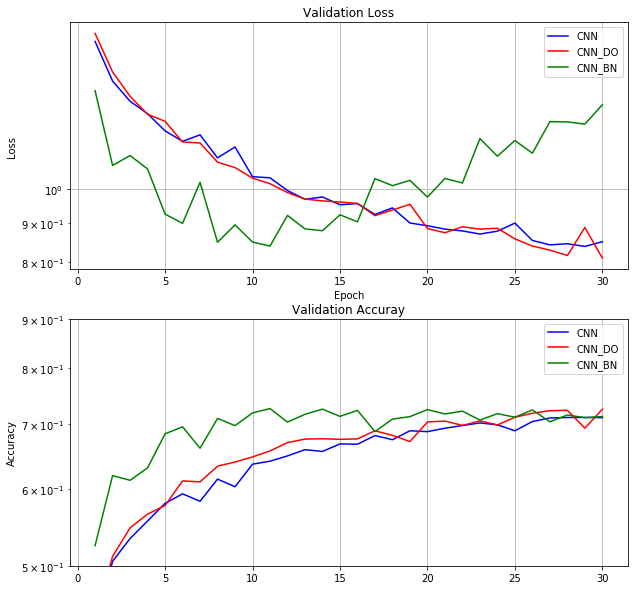

## **실습 과제**

### 과제1 성능 개선을 위해서 다양한 실험이 필요해 보인다.
#### -- Layer / Feature map 숫자 변경, 
#### -- dropout / batch normalization 위치 및 숫자 변경,
#### -- batch size, epoch 변경을 통해 모델을 최적화 해 보자 
#### -- 조별로 최고의 성능을 달성한 모델의 구조와 주요 hyper-parameter 및 최고 val_acc를 기록하자 : 


A조의 최고기록은 78.66으로 다섯단의 conv 레이어를 쌓고, 1단째에서 64부터 시작해서 3단째까지 레이어를 128, 512로 계속해서 늘리다가, 4단째부터 2분의 1로 줄여가는 구조이다. 사이에 batch_normalization을 0.85로넣어서 보정해주었다.

이 과정에서 알 수 있었던 것은 다음과 같다.

1. 마냥 여러가지 최적화 기법을 사용한다고 가장 좋은 결과가 나오는 것은 아니라는 점. batch_normalization과 l2 regularizator를 함께 쓸때는 오히려 더 나쁜 결과가 나타났다.

l2 regularization의 경우에는 weight 값을 보정해주는 것인 반면, batch_normalization의 경우에는 나오는 결과값들을 scaling해주는 것이기 때문에 둘을 같이 쓰는 것이 좋은 점이 없다는 것이다.

이처럼 최적화 기법을 사용할 때 해당 기법이 어떤 역할을 하는지를 제대로 이해하지 못하거나, 데이터의 성격을 제대로 파악하지못하면 오히려 좋지 못한 결과를 도출한다.

2. layer가 깊다고 해서 항상 좋은 것은 아니라는 점. layer를 어느 선까지 늘릴때는 효율적일수도 있지만 그렇다고 지나치게 많은 양을 늘릴 경우에는 오히려 더 좋지 못한 결과를 확인할 수 있었다.

3. 실험의 방향성을 초기에 잘 설정하는 것이 중요하다는 점. 초기에 소량의 epoch를 돌리면서 올바른 방향으로 실험을 설계해야 최적의 결과물을 뽑을 수 있다는 사실을 알 수 있었다.